In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


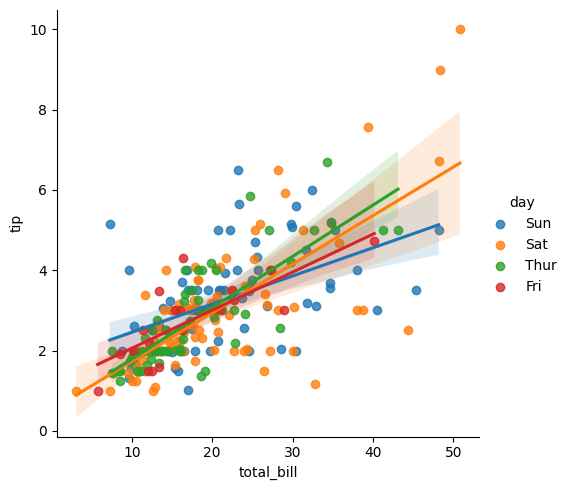

In [3]:
import seaborn as sns
sns.lmplot(x="total_bill", y="tip", hue="day", data=data)

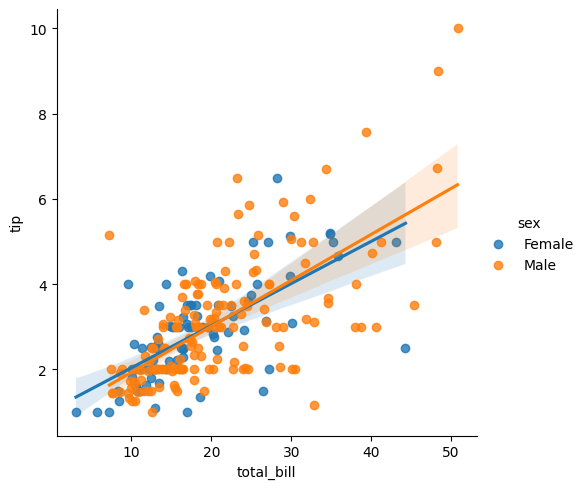

In [4]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=data)

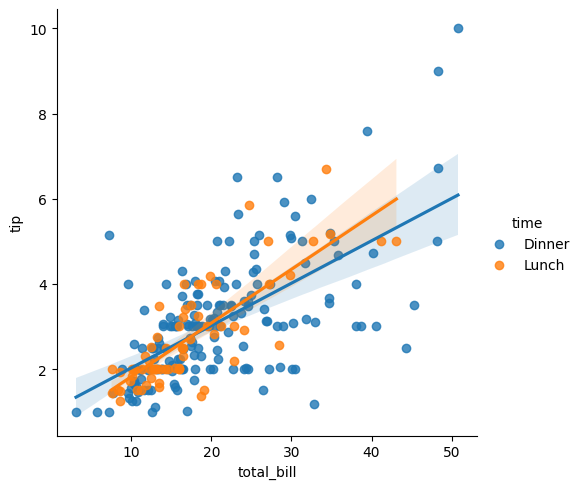

In [5]:
sns.lmplot(x="total_bill", y="tip", hue="time", data=data)

In [6]:
figure = px.pie(data,
             values='tip',
             names='day',hole = 0.5)
figure.show()

In [7]:
figure = px.pie(data,
             values='tip',
             names='sex',hole = 0.5)
figure.show()

In [8]:
figure = px.pie(data,
             values='tip',
             names='smoker',hole = 0.5)
figure.show()

In [9]:
figure = px.pie(data,
             values='tip',
             names='time',hole = 0.5)
figure.show()

In [10]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [12]:
x = np.array(data[["total_bill", "sex", "smoker", "day",
                   "time", "size"]])
y = np.array(data["tip"])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [14]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])